In [2]:
### Preparing the workbook
import numpy as np
import pandas as pd
import pyfolio as pf
import talib 

%matplotlib inline

In [3]:
### Load Data
### Reading 中证500 ETF（510500）
data = pd.read_csv('../../data/index_shanghai.csv', index_col='date', parse_dates=True)

### weekly resample
#ohlc_dict = {
#    'open':'first',
#    'high':'max',
#    'low':'min',
#    'close':'last',
#    'vol':'sum'
#    }
#data = data.resample('W-Fri', how=ohlc_dict)

data = data['20050901'::]
#data = data['20120315']
ret = pd.DataFrame()
ret['ret_cc'] = (data['close'] / data['close'].shift(1) - 1)
ret['ret_co'] = (data['close'] / data['open'] - 1)
ret['ret_oc'] = (data['open'] / data['close'].shift(1) - 1)

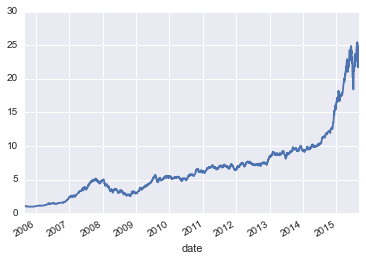

In [4]:
(1+ret['ret_co']).cumprod().plot()

Entire data start date: 2005-01-04
Entire data end date: 2015-10-27


Backtest Months: 124
                   Backtest
annual_return          0.49
annual_volatility      0.32
sharpe_ratio           1.54
calmar_ratio           0.91
stability              0.96
max_drawdown          -0.54
omega_ratio            1.30
sortino_ratio          2.17
skewness              -0.55
kurtosis               2.34
alpha                   NaN
beta                    NaN

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              35.98 2015-06-12  2015-07-07           NaT      NaN
3              24.64 2011-08-26  2012-01-05    2012-03-13      143
4              12.51 2013-05-30  2013-06-24    2013-07-23       39
1               7.48 2015-04-27  2015-05-07    2015-05-13       13
2               6.03 2015-05-27  2015-05-28    2015-06-02        5


2-sigma returns daily    -0.038
2-sigma returns weekly   -0.072
dtype: float64


/Applications/anaconda/lib/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


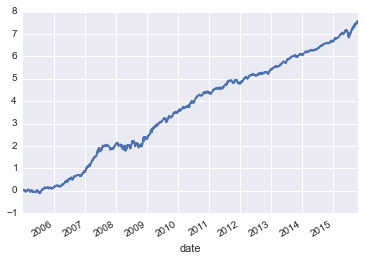

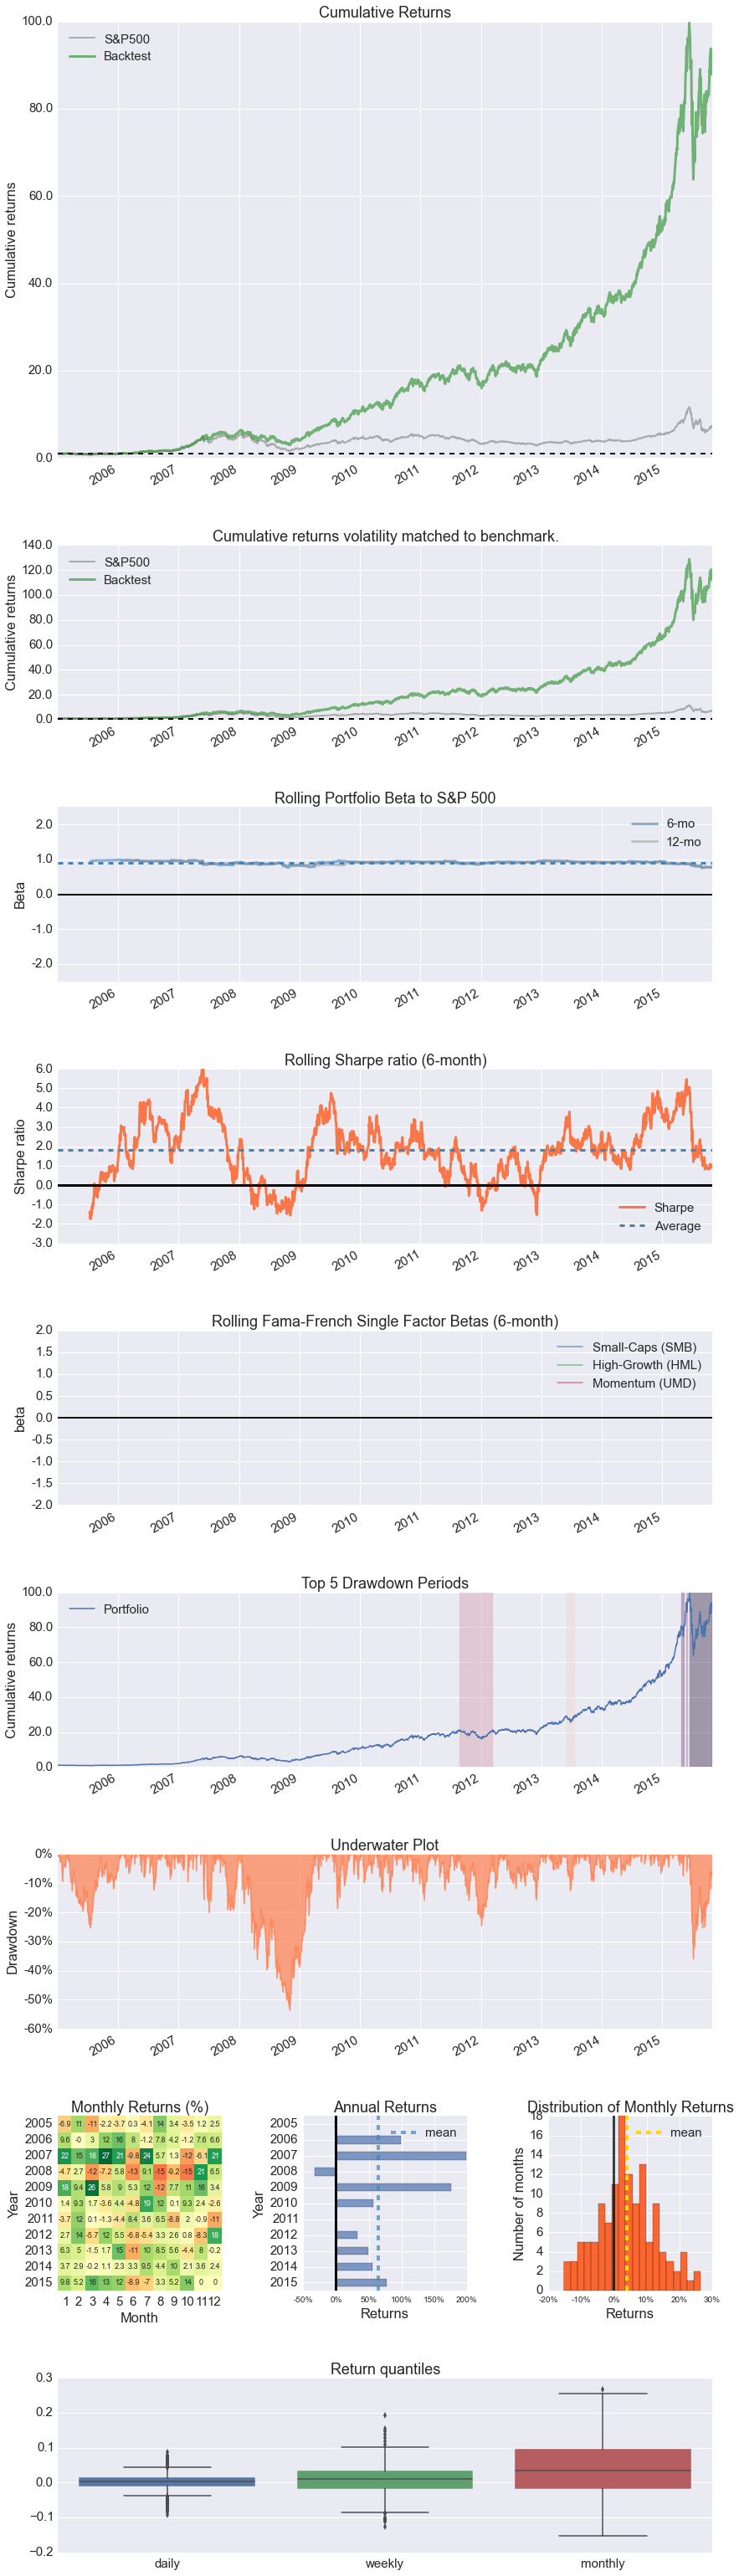


Stress Events
                                    mean    min    max
Lehmann                           -0.006 -0.077  0.088
US downgrade/European Debt Crisis  0.001 -0.036  0.040
Fukushima                          0.001 -0.014  0.015
EZB IR Event                       0.000 -0.029  0.025
Aug07                              0.003 -0.059  0.037
Sept08                            -0.005 -0.050  0.041
2009Q1                             0.008 -0.071  0.043
2009Q2                             0.006 -0.055  0.057
Flash Crash                        0.000 -0.030  0.040
Apr14                              0.001 -0.027  0.016
Oct14                              0.001 -0.012  0.022
Fall2015                          -0.001 -0.077  0.063


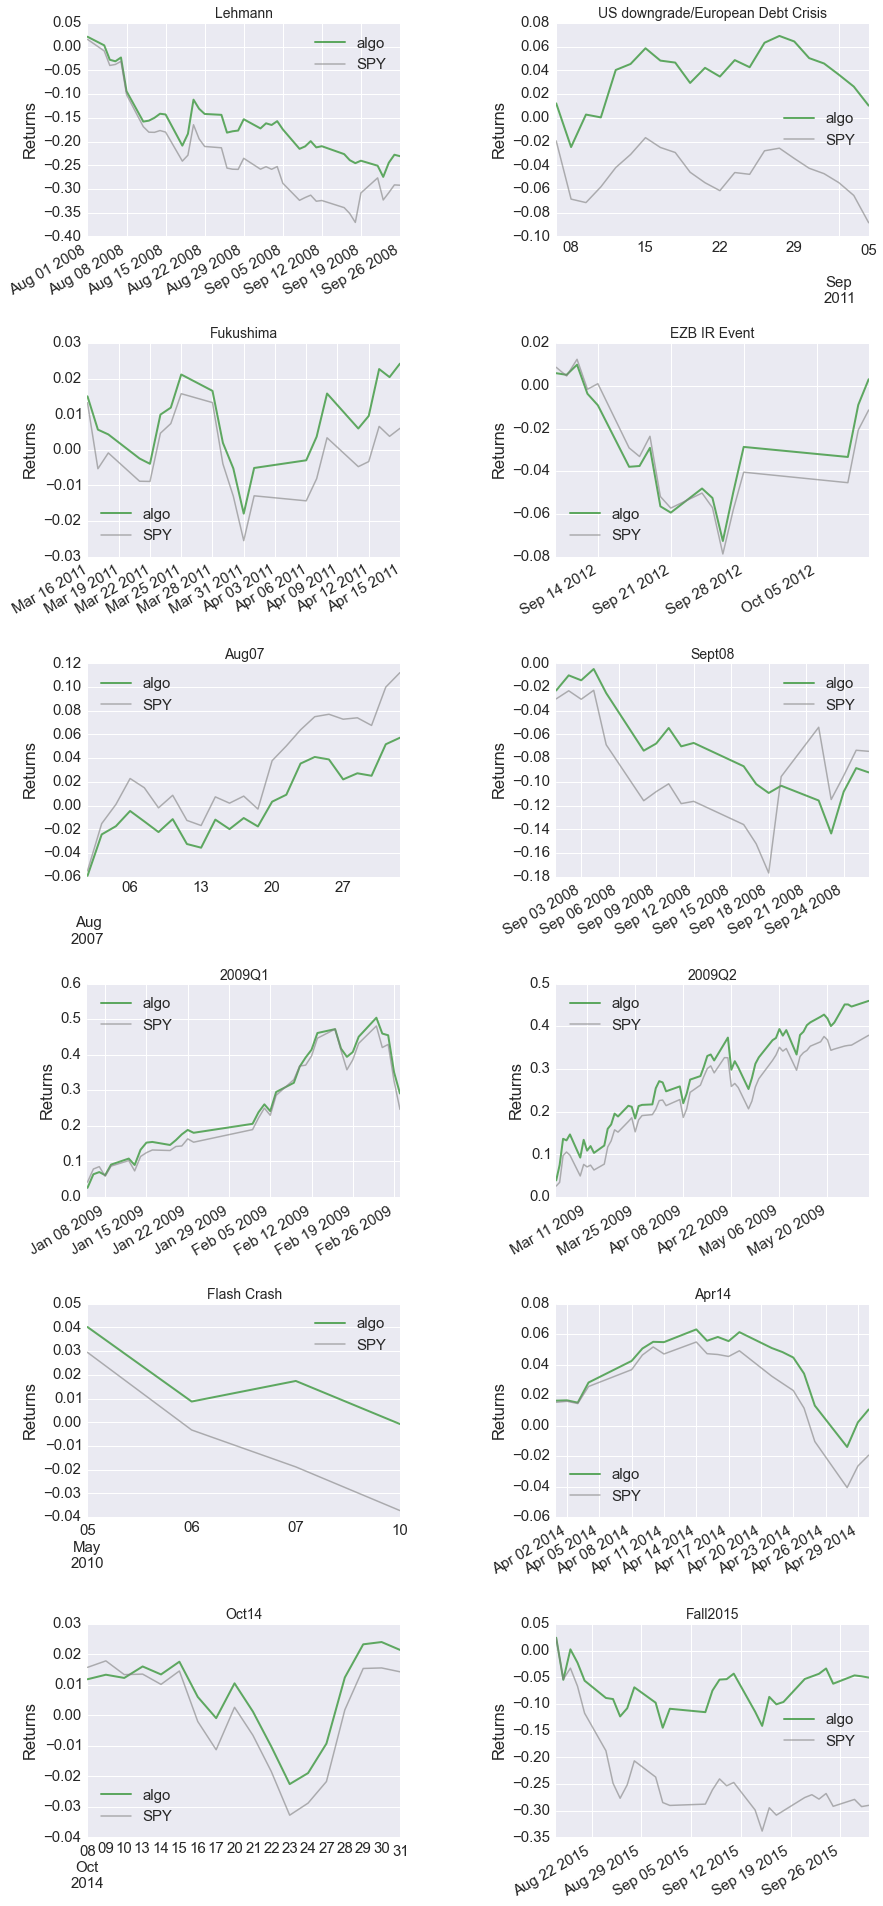

In [64]:
### Load Data
### Reading 中证500 ETF（510500）
data = pd.read_excel('../../data/中证500_20151027.xlsx', index_col='date', parse_dates=True)
ret = pd.DataFrame()
ret['cc'] = (data['close'] / data['close'].shift(1) - 1)
ret['co'] = (data['close'] / data['open'] - 1)
ret['oc'] = (data['open'] / data['close'].shift(1) - 1)
(ret['co'] - ret['oc']).cumsum().plot()
pf.create_full_tear_sheet((ret['co']), benchmark_rets=ret['cc'])

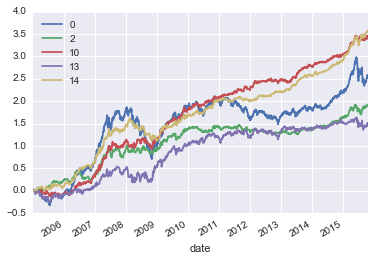

In [67]:
ret_strategy = pd.DataFrame()
ret_strategy['0'] = ret['cc']
#ret_strategy['1'] = ret['oc'] * (ret['co'] > 0).shift(1)
ret_strategy['2'] = ret['co'] * ((ret['oc'] > 0)*1).shift(1)
#ret_strategy['3'] = ret['oc'] * (ret['co'] < 0).shift(1)
#ret_strategy['4'] = ret['co'] * (ret['oc'] < 0).shift(1)
ret['5'] = ret['co'] * ((ret['co'] > 0)*1).shift(1)
#ret_strategy['6'] = ret['co'] * (ret['co'] < 0).shift(1)
#ret_strategy['7'] = ret['oc'] * (ret['oc'] > 0).shift(1)
#ret_strategy['8'] = ret['oc'] * (ret['oc'] < 0).shift(1)

#ret_strategy['9'] = ret['co'] * (ret['cc'] < 0).shift(1)
ret_strategy['10'] = ret['co'] * ((ret['cc'] > 0)*1).shift(1)
#ret_strategy['11'] = ret['oc'] * (ret['cc'] < 0).shift(1)
#ret_strategy['12'] = ret['oc'] * (ret['cc'] > 0).shift(1)


ret_strategy['13'] = ret['co'] * ((ret['oc'] < 0)*1)
ret_strategy['14'] = ret['co'] * ((ret['oc'] > 0)*1)

ret_strategy.cumsum().plot()

Entire data start date: 2005-01-04
Entire data end date: 2015-10-27


Backtest Months: 124
                   Backtest
annual_return          0.35
annual_volatility      0.22
sharpe_ratio           1.55
calmar_ratio           1.82
stability              0.96
max_drawdown          -0.19
omega_ratio            1.42
sortino_ratio          2.24
skewness              -0.50
kurtosis               6.92
alpha                  0.24
beta                   0.45

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              14.78 2015-08-17  2015-09-17           NaT      NaN
1              11.98 2015-06-12  2015-07-01    2015-07-22       29
3               6.29 2015-04-27  2015-05-05    2015-05-19       17
2               6.03 2015-05-27  2015-05-28    2015-06-02        5
4               4.24 2015-07-29  2015-08-05    2015-08-10        9


2-sigma returns daily    -0.027
2-sigma returns weekly   -0.053
dtype: float64


/Applications/anaconda/lib/python3.4/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


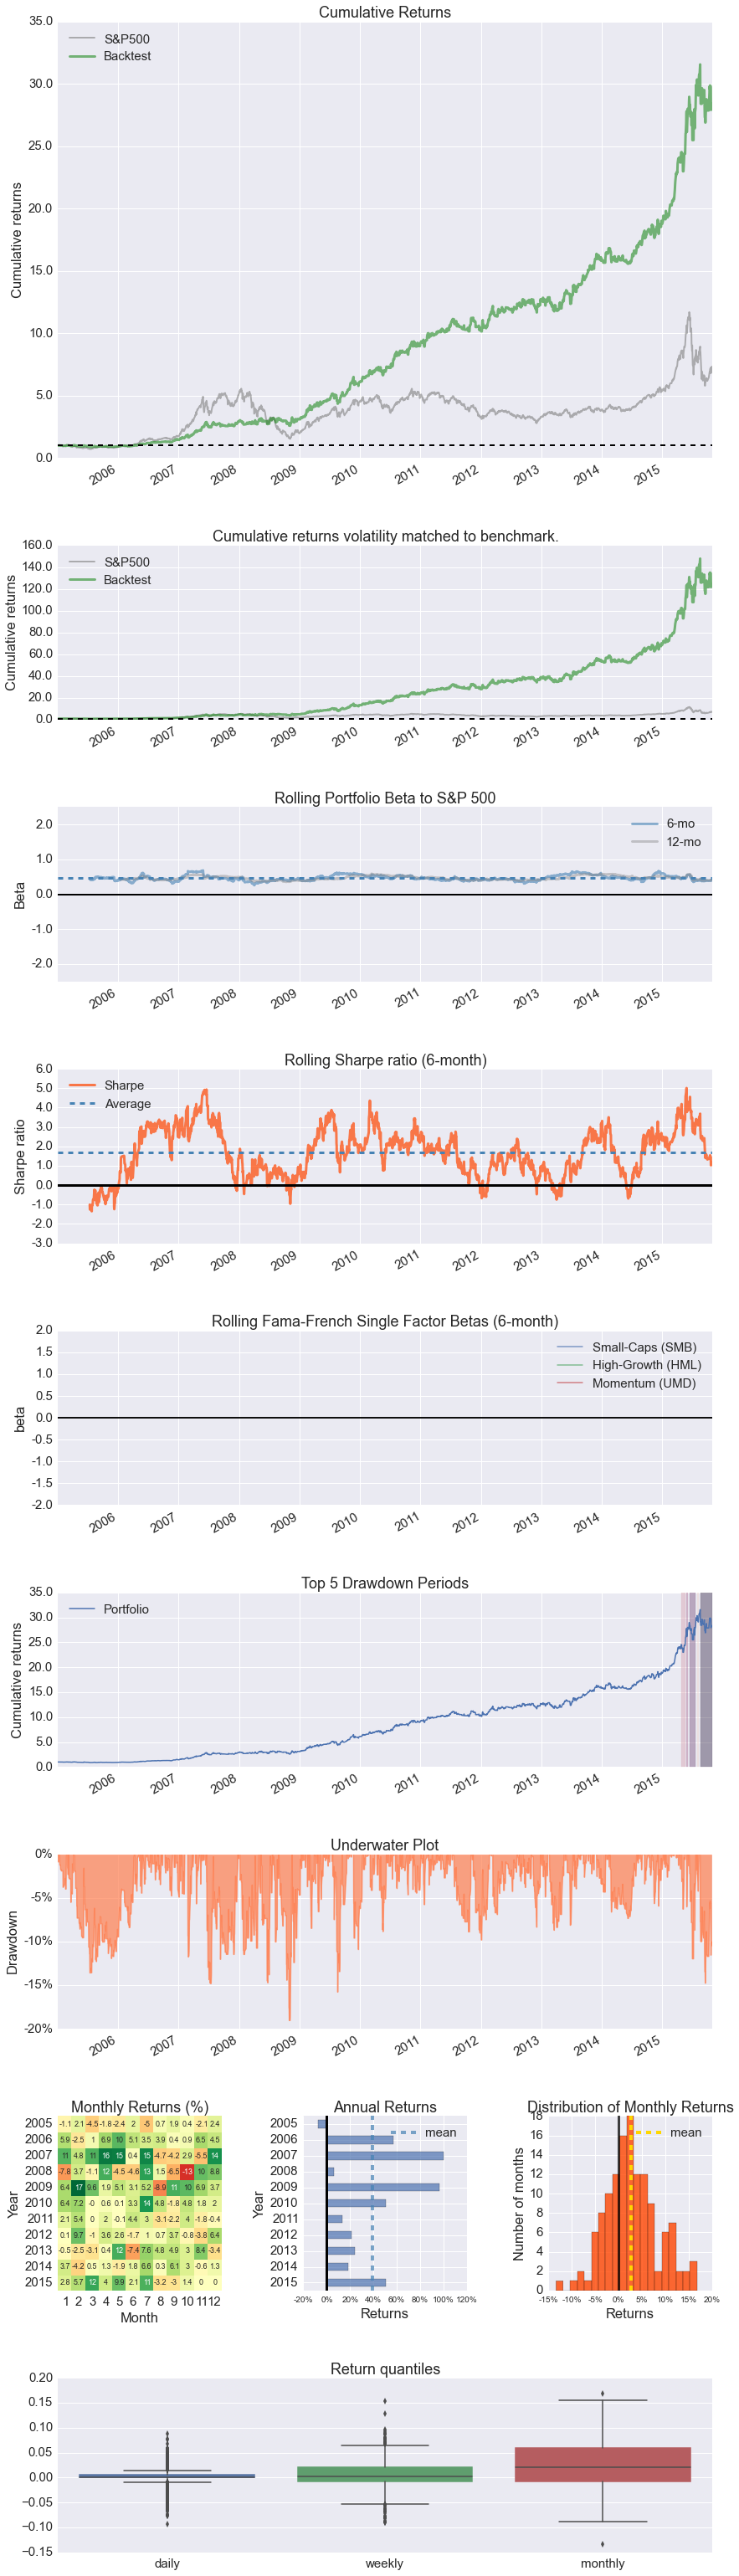


Stress Events
                                    mean    min    max
Lehmann                           -0.001 -0.073  0.088
US downgrade/European Debt Crisis -0.001 -0.036  0.013
Fukushima                          0.001 -0.010  0.013
EZB IR Event                      -0.000 -0.028  0.022
Aug07                             -0.002 -0.059  0.026
Sept08                            -0.003 -0.023  0.022
2009Q1                             0.006 -0.037  0.037
2009Q2                             0.003 -0.055  0.057
Flash Crash                       -0.002 -0.030  0.040
Apr14                              0.001 -0.010  0.014
Oct14                              0.002 -0.011  0.022
Fall2015                          -0.003 -0.077  0.048


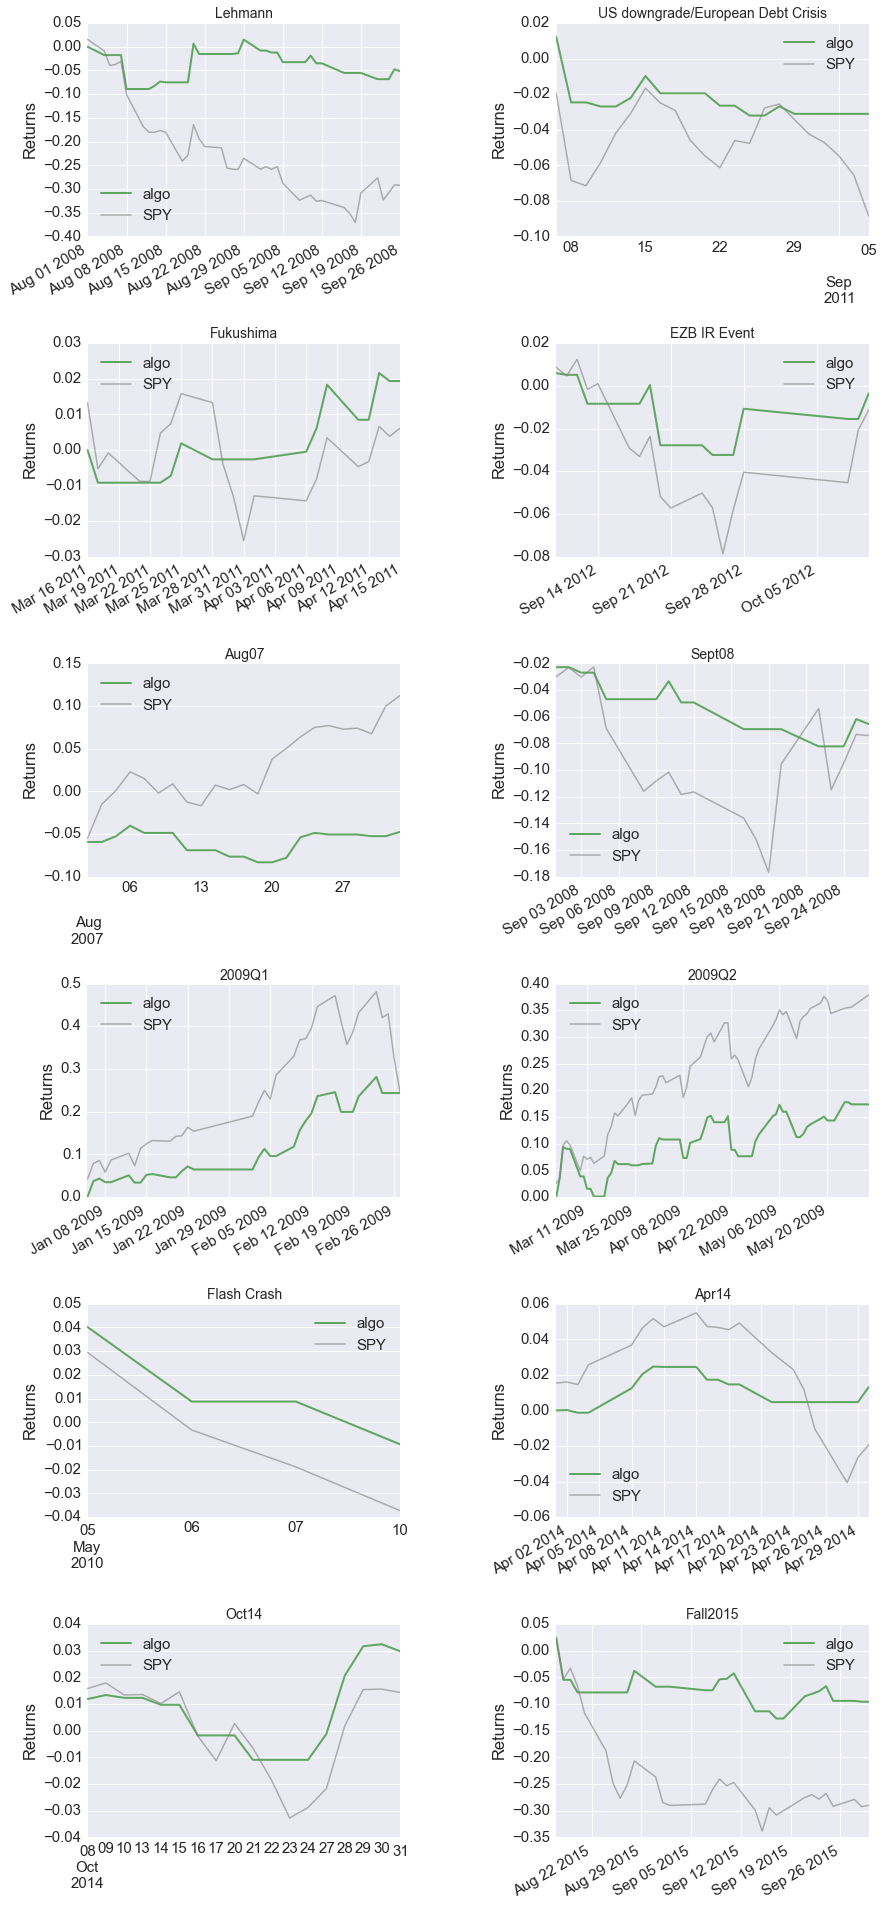

In [71]:
pf.create_full_tear_sheet(ret['5'], benchmark_rets=ret['cc'])